In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15494, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15494 (delta 0), reused 1 (delta 0), pack-reused 15490
Receiving objects: 100% (15494/15494), 14.09 MiB | 7.11 MiB/s, done.
Resolving deltas: 100% (10411/10411), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

### Download pretrained YOLOv3 weights


In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-11-01 18:38:00--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  17.0MB/s    in 15s     

2022-11-01 18:38:16 (15.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

# define helper functions
def imShow(path):
  # import cv2
  # import matplotlib.pyplot as plt
  # %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(12, 8)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

### Mount Google Drive to Use files

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')
# drive.mount('/content/drive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
%cd darknet

/content/darknet


# Training a Custom YOLOv3 Object Detector in the Cloud!

In [ ]:
!ls /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/localize_gw/

backup	generate_train.py  obj.data  obj.names	obj.zip  res  yolov3_custom.cfg


In [ ]:
!cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/localize_gw/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d /content/data/

Archive:  ../obj.zip
  inflating: /content/data/obj/2020080.2000_30250_0 (1).png  
  inflating: /content/data/obj/2020080.2000_30250_0 (1).txt  
  inflating: /content/data/obj/2020080.2000_30250_0 (10).png  
  inflating: /content/data/obj/2020080.2000_30250_0 (10).txt  
  inflating: /content/data/obj/2020080.2000_30250_0 (100).png  
  inflating: /content/data/obj/2020080.2000_30250_0 (100).txt  
  inflating: /content/data/obj/2020080.2000_30250_0 (101).png  
  inflating: /content/data/obj/2020080.2000_30250_0 (101).txt  
  inflating: /content/data/obj/2020080.2000_30250_0 (102).png  
  inflating: /content/data/obj/2020080.2000_30250_0 (102).txt  
  inflating: /content/data/obj/2020080.2000_30250_0 (103).png  
  inflating: /content/data/obj/2020080.2000_30250_0 (103).txt  
  inflating: /content/data/obj/2020080.2000_30250_0 (104).png  
  inflating: /content/data/obj/2020080.2000_30250_0 (104).txt  
  inflating: /content/data/obj/2020080.2000_30250_0 (105).png  
  inflating: /content/dat

In [ ]:
!mv /content/data/obj /content/darknet/data

### Configuring Files for Training

In [ ]:
!cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/localize_gw/yolov3_custom.cfg ./cfg

In [ ]:
!cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/localize_gw/obj.names ./data
!cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/localize_gw/obj.data  ./data

### Generating train.txt

In [ ]:
!cp /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/localize_gw/generate_train.py ./

Now we simply run the python script to do all the work for us.

In [ ]:
!python ./generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


### Download pre-trained weights for the convolutional layers.

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2022-11-01 18:38:46--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  17.8MB/s    in 9.9s    

2022-11-01 18:38:57 (15.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## Train Your Custom Object Detector!

In [ ]:
## train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show
## !/content/darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.507586), count: 4, class_loss = 1.652288, iou_loss = 0.839296, total_loss = 2.491583 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.009999, iou_loss = 0.000000, total_loss = 0.009999 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.009527, iou_loss = 0.000000, total_loss = 0.009527 
 total_bbox = 22608, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.539438), count: 5, class_loss = 1.797674, iou_loss = 0.802993, total_loss = 2.600667 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.010123, iou_loss = 0.000000, total_loss = 0.010123 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

In [ ]:
imShow('chart.png')

**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [ ]:
# !./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/GW_localize/backup/yolov3_custom_last.weights -dont_show

# Step 6: Run Your Custom Object Detector!!!
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


###Test a single file

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

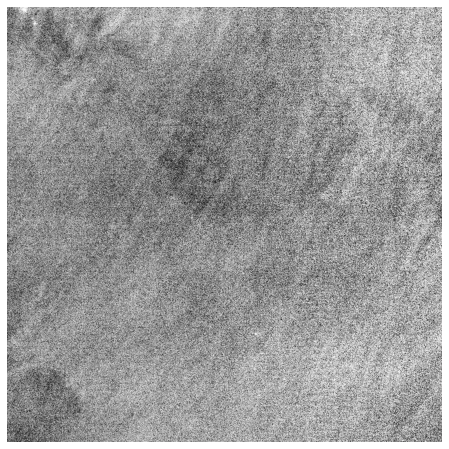

In [ ]:
# # run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
! ./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/localize_gw/backup/yolov3_custom_last-400.weights -dont_show /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/GW_localize/test_data/200.png #-thresh 0.1
imShow('predictions.jpg')

## Test for all files in a dir

In [ ]:
%%capture
import os,sys
import subprocess
# directory = '/content/darknet/data/test/'
dir = '/content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/GW_localize/test_data/'
for filename in os.listdir(dir):
    cmd =  "./darknet detector test data/obj.data cfg/yolov3_custom_2.cfg /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/localize_gw/backup/yolov3_custom_last-400.weights -dont_show -thresh 0.8 /content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/GW_localize/test_data/" + filename
    try:
      !{cmd}
    except:
      print("failed")
    cmd = "cp 'predictions.jpg' '/content/gdrive/MyDrive/NASA-LWS-Gravity-Wave-Project/localize_gw/res/" + filename + "_.8.jpg' "
    !{cmd}